In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf


# ">=3.11,<3.12"


2025-06-12 11:57:01.152925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-12 11:57:01.171376: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-12 11:57:01.176706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-12 11:57:01.190268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-12 11:57:02.086864: W tensorflow/compiler/tf2

In [2]:
data = pd.read_csv("../data/train.csv")


new_order = [
    "tweet",
    "count",
    "hate_speech_count",
    "offensive_language_count",
    "neither_count",
    "class",
]


data = data[new_order]

data.head()


,tweet,count,hate_speech_count,offensive_language_count,neither_count,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,3,0,0,3,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,3,0,3,0,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,3,0,3,0,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,3,0,2,1,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,6,0,6,0,1


In [3]:
# sudo apt install nvidia-cuda-toolkit

# python3 -c "import sys;print(sys.executable);import tensorflow as tf;print(tf.__version__);print(tf.config.list_physical_devices("GPU"))"


In [4]:
data.describe()

data.columns


Index(['tweet', 'count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'class'],
      dtype='object')

In [20]:
# data.loc[tweet]
print(data[data["offensive_language_count"] == 9])
print(data.iloc[23793]["tweet"])


                                                   tweet  count  \
1296   &#8220;@Hermosa_Jayy: Can I bring anotha bitch...      9   
1491   &#8220;@RileyyBryn: &#8220;@devon_sheaa: I jus...      9   
1600   &#8220;@WEEEDITH: All I want is bitches, big b...      9   
1861   &#8220;@najmaaa_ali: Lool I agree RT&#8220;@st...      9   
2723   @CDNBallJunkie Spurs bitch that's the team, yo...      9   
...                                                  ...    ...   
23039                                  Y'all hoes so ugh      9   
23560  all these beautiful bitches, sucha beautiful t...      9   
23793  errybody in dis bitch getting tips (whispers) ...      9   
24204  man kills mother of 2 after she reveals she's ...      9   
24563                                         this bitch      9   

       hate_speech_count  offensive_language_count  neither_count  class  
1296                   0                         9              0      1  
1491                   0                     

In [6]:
from tensorflow.keras.layers import TextVectorization


X = data["tweet"]
y = data[data.columns[1:]].values

# X.head()
# y[:5]
# type(y)


In [7]:
vectorizer = TextVectorization(
    max_tokens=200000,
    output_mode="int",
    output_sequence_length=2000,
)


vectorizer.adapt(X.values)


vectorized_text = vectorizer(X.values)
vectorizer.get_vocabulary()

# vectorized_text[:5]

# vectorized_text.shape


I0000 00:00:1749729424.088747   15106 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749729424.329924   15106 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749729424.330047   15106 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749729424.333519   15106 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1749729424.333637   15106 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

['',
 '[UNK]',
 'a',
 'bitch',
 'rt',
 'i',
 'the',
 'you',
 'to',
 'and',
 'my',
 'that',
 'in',
 'bitches',
 'is',
 'like',
 'me',
 'of',
 'on',
 'be',
 'hoes',
 'this',
 'for',
 'pussy',
 'im',
 'it',
 'hoe',
 'with',
 'dont',
 'ass',
 'your',
 'up',
 'all',
 'if',
 'just',
 'but',
 'get',
 'fuck',
 'so',
 'they',
 'when',
 'these',
 'no',
 'got',
 'u',
 'shit',
 'nigga',
 'not',
 'aint',
 'was',
 'are',
 'she',
 'her',
 'trash',
 'at',
 'out',
 'have',
 'lol',
 'its',
 'about',
 'he',
 'some',
 'what',
 'amp',
 'do',
 'know',
 'can',
 'niggas',
 'we',
 'how',
 'them',
 'one',
 'love',
 'or',
 'as',
 'cant',
 'who',
 'yall',
 'fucking',
 'go',
 'thats',
 'yo',
 'want',
 'from',
 'now',
 'bad',
 'why',
 'youre',
 'then',
 'his',
 'good',
 'man',
 'too',
 'still',
 'make',
 'say',
 'off',
 'ya',
 'look',
 'hate',
 'see',
 'think',
 'only',
 'an',
 'need',
 'back',
 'never',
 'will',
 'time',
 'faggot',
 'really',
 'people',
 'girl',
 'real',
 'right',
 'being',
 'even',
 'would',
 'wh

In [8]:
MAX_FEATURES = 20000

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(MAX_FEATURES)
dataset = dataset.batch(20)
dataset = dataset.prefetch(8)


In [9]:
batch_X, batch_y = dataset.as_numpy_iterator().next()


2025-06-12 11:57:06.947973: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [10]:
train = dataset.take(int(len(dataset) * 0.7))
val = dataset.skip(int(len(dataset) * 0.7)).take(int(len(dataset) * 0.2))
test = dataset.skip(int(len(dataset) * 0.9)).take(int(len(dataset) * 0.1))

train_generator = train.as_numpy_iterator()
train_generator


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x72d321fffc90>)

In [28]:
pd.DataFrame(batch_y


array([[3, 1, 2, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 2, 1, 0, 0],
       [6, 0, 5, 1, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 2, 1, 1],
       [3, 0, 0, 3, 2],
       [3, 0, 3, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 0, 3, 2],
       [3, 1, 2, 0, 1],
       [3, 1, 2, 0, 1],
       [3, 0, 1, 2, 2],
       [3, 0, 3, 0, 1],
       [6, 0, 6, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 3, 0, 1],
       [3, 0, 0, 3, 2]])

In [ ]:
from sklearn.preprocessing import StandardScaler  # Or MinMaxScaler, etc.

scaler = StandardScaler()

scaler.fit(train)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding


vocab_size = 10000
embedding_dim = 16
max_length = 100

model = Sequential(
    [
        Embedding(vocab_size, embedding_dim, input_shape=(max_length,)),
        Bidirectional(LSTM(8)),
    ]
)
# model.add(Embedding(MAX_FEATURES + 1, 32))
# model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="sigmoid"))


# Example vocabulary size
# Example embedding dimension
# Example sequence length (after padding)


/home/mrmauler/DRIVE/projects/dl/comment_toxicity/.venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(loss="BinaryCrossentropy", optimizer="Adam", metrics=["accuracy"])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,341 (899.77 KB)

 Trainable params: 230,341 (899.77 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train, epochs=1, validation_data=val)


2025-06-12 11:57:11.441031: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


868/868 ━━━━━━━━━━━━━━━━━━━━ 178s 200ms/step - accuracy: 0.9928 - loss: -3899746.7500 - val_accuracy: 1.0000 - val_loss: -100428416.0000


{'accuracy': [0.9990207552909851], 'loss': [-19707996.0], 'val_accuracy': [1.0], 'val_loss': [-100428416.0]}


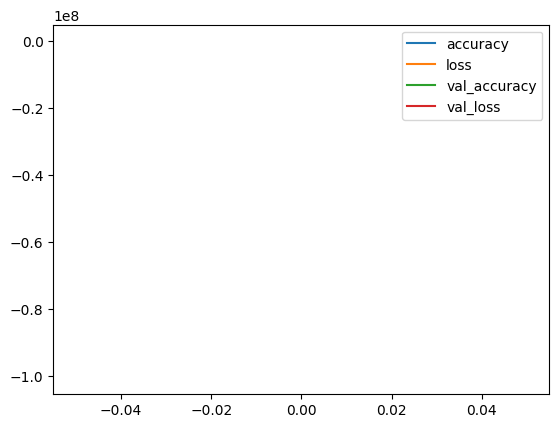

In [14]:
print(history.history)

from matplotlib import pyplot as plt

# import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()


In [15]:
# res.plot()
# plt.show()


batch_X, batch_y = test.as_numpy_iterator().next()
res = model.predict(batch_X)  # (> 0.5).astype(int)
print(res)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
[[1.0000000e+00 0.0000000e+00 1.0000000e+00 2.4596508e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.7871494e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 3.1582539e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 3.1582539e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.7871494e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.4596508e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 3.1582539e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 3.1582539e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.7871494e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.4596508e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 3.1582539e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.7871494e-10 1.0000000e+00]
 [1.0000000e+00 0.0000000e+00 1.0000000e+00 2.7871494e-10 1.0000000e+00]
 [1.0000000e

In [21]:
input_txt = vectorizer(
    "errybody in dis bitch getting tips (whispers) errybody in dis bitch getting tipsy"
)


# result = model.predict(np.array([input_txt]))
result = model.predict(np.expand_dims(input_txt, 0))
result_df = pd.DataFrame(result, columns=data.columns[1:])
print(result_df)
result_df.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
   count  hate_speech_count  offensive_language_count  neither_count  class
0    1.0                0.0                       1.0   2.875623e-10    1.0


(1, 5)

In [17]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

precision = Precision()
recall = Recall()
cat_acc = CategoricalAccuracy()


for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    y_pred = model.predict(X_true)

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    precision.update_state(y_true, y_pred)
    recall.update_state(y_true, y_pred)
    cat_acc.update_state(y_true, y_pred)


print(
    f"Precision:{precision.result().numpy()},Recall:{recall.result().numpy()}, Cat_Acc:{cat_acc.result().numpy()},  "
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ -14s -13514864us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━

2025-06-12 12:00:32.116295: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
import joblib

#
# joblib.dump(model, "toxicity_model.joblib")
#
#
# joblib.dump(
#     vectorizer,
#     "/home/mrmauler/DRIVE/projects/dl/comment_toxicity/core/model/vectorizer.joblib",
# )
#
#
# model.save(
#     "/home/mrmauler/DRIVE/projects/dl/comment_toxicity/core/model/toxicity_model.keras"
# )


['toxicity_model.joblib']